# Results from DFT Calculations
This jupyter notebook extracts the results from the DFT calculations given from VASP.

## Layer Calculations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sns.set()
sys.path.append('../../')
from Code.python_scripts.functions.data import readFilesFromDirectory, readEnergyFromFile


### Convergence

#### Vacuum 

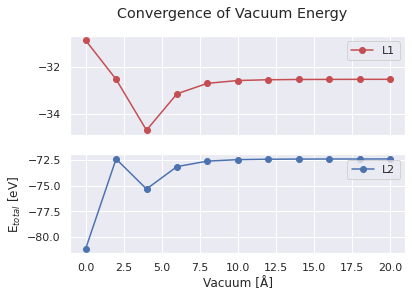

In [4]:
thisdir = '../Layers/convergence_Results/L1'
filepaths, filenames = readFilesFromDirectory(thisdir)
data1 = readEnergyFromFile(filepaths, filenames)

thisdir = '../Layers/convergence_Results/L2'
filepaths, filenames = readFilesFromDirectory(thisdir)
data2 = readEnergyFromFile(filepaths, filenames)


vacuum_energy1 = data1['vacuum.txt']
vacuum_energy2 = data2['vacuum.txt']
vacuum = np.linspace(0, 20, 11)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of Vacuum Energy')

ax1.plot(vacuum, vacuum_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(vacuum, vacuum_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("Vacuum [Å]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()


#### Total Energy
Both for 1 layer and 2 layers

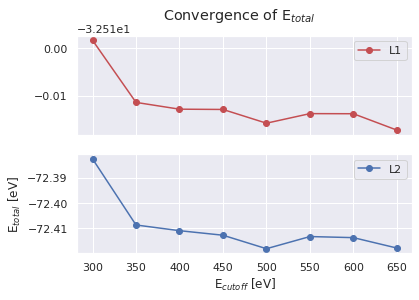

In [11]:
total_energy1 = data1['ecut1.txt'].dropna()
total_energy2 = data2['ecut1.txt'].dropna()
cutoff = np.linspace(300, 650, 8)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of E$_{total}$')

ax1.plot(cutoff, total_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(cutoff, total_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()


## Energy

#### Extracting Energy calculation for single atoms

Assigning the energy values for the single atom and crystal calculation

In [27]:
thisdir = '../atom_Energy'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)

barium = data['barium.txt']
silicon = data['silicon.txt']
carbon = data['carbon.txt']

basi2_atoms = 4*barium[0] + 8*silicon[0]
basi2_crystal = 2*barium[1] + silicon[2]
basi2_cluster = 8*barium[0] + 4*silicon[1]

### Enthalpy of Formation
We also calculate the enthalpy of formation ($\Delta H_f$) of these compounds with respect to their elemental standard to model the thermodynamic function; this is important information for synthesis of the material. Enthalpy of formation ($\Delta H_f$) is calculated by using following equation:

$\Delta H_f$(BaSi$_2$) = E$_{tot}$(BaSi$_2$) - $\mu_{Ba}$ - 2$\mu_{Si}$

Here, $\Delta H_f$(BaSi$_2$) is the enthalpy of formation of compound BaSi$_2$. E$_{tot}$ (BaSi$_2$) is the total energy of the compound BaSi$_2$. $\mu_{Ba}$ and $\mu_{Si}$ represent the chemical potential of respective element (Ba and Si), i.e., a ground state total energy of each elemental solid per atom.


In [28]:
thisdir = '../Layers/energies/etot.txt'
folders = ['Bulk', 'L1$_U$', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
data = pd.read_table(thisdir, delim_whitespace=True)

energies = pd.DataFrame({"$E_{tot}$ [eV]": data['energy']})
hf = []
ecoh = []

hf.append((data['energy'][0] - 2*basi2_crystal)/24)
ecoh.append((data['energy'][0] - 2*basi2_atoms)/24)
energies['$E_{tot}$ [eV]'][0] = energies['$E_{tot}$ [eV]'][0]/24
for i in range(1, len(folders)):
    energies['$E_{tot}$ [eV]'][i] = energies['$E_{tot}$ [eV]'][i]/(i*12)
    temp1 = (data['energy'][i] - i*basi2_crystal)/(i*12)
    temp2 = (data['energy'][i] - i*basi2_atoms)/(i*12)
    hf.append(temp1)
    ecoh.append(temp2)
    

energies['$\Delta H_f$ [eV]'] = hf
energies['$E_{cohesive}$ [eV]'] = ecoh
energies['Structure'] = folders

energies.set_index('Structure')

#print(energies.to_latex(index=False))

,$E_{tot}$ [eV],$\Delta H_f$ [eV],$E_{cohesive}$ [eV]
Structure,,,
Bulk,-4.060472,-0.388524,-4.680065
L1$_U$,-3.439713,0.232235,-4.059305
L2,-3.804234,-0.132287,-4.423827
L3,-3.886466,-0.214519,-4.506059
L4,-3.929322,-0.257374,-4.548914
L5,-3.955254,-0.283306,-4.574846
L6,-3.972646,-0.300699,-4.592239
L7,-3.985131,-0.313184,-4.604724


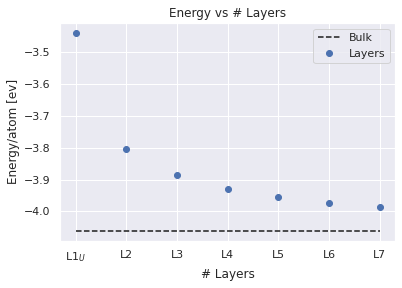

In [29]:
bulk = np.ones(len(energies['$E_{tot}$ [eV]'][1:]))*energies['$E_{tot}$ [eV]'][0]

plt.plot(folders[1:], bulk, '--k')
plt.plot(folders[1:], energies['$E_{tot}$ [eV]'][1:], 'ob')
plt.title("Energy vs # Layers")
plt.ylabel("Energy/atom [ev]")
plt.xlabel("# Layers")
plt.legend(['Bulk', 'Layers'])

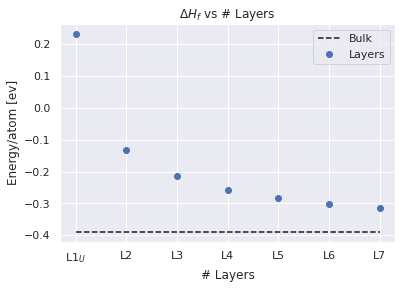

In [30]:
bulk = np.ones(len(energies['$\Delta H_f$ [eV]'][1:]))*energies['$\Delta H_f$ [eV]'][0]

plt.plot(folders[1:], bulk, '--k')
plt.plot(folders[1:], energies['$\Delta H_f$ [eV]'][1:], 'ob')
plt.title("$\Delta H_f$ vs # Layers")
plt.ylabel("Energy/atom [ev]")
plt.xlabel("# Layers")
plt.legend(['Bulk', 'Layers'])

### Interlayer Energy calculations
Extracting the data from the text files and visualize the data in plots

#### Graphite

Text(0, 0.5, 'Energy/atom [ev]')

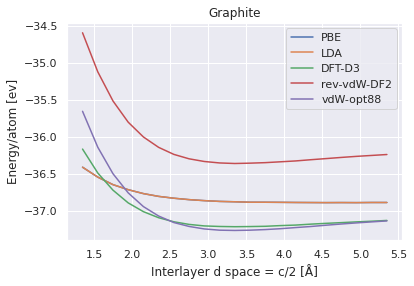

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/Graphite/DFT-D3.txt'
rev = '../Layers/L_L_distance/Graphite/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/Graphite/PBE.txt'
lda = '../Layers/L_L_distance/Graphite/LDA.txt'
vdw = '../Layers/L_L_distance/Graphite/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)


# The starting distance between layers
origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
x += origo
n = 4 # Number of atoms
plt.plot(x, pbe['energy'])
plt.plot(x, lda['energy'])
plt.plot(x, dft['energy'])
plt.plot(x, rev['energy'])
plt.plot(x, vdw['energy'])
plt.legend(['PBE', 'LDA', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('Graphite')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')

#### BaSi2

##### Layer

Text(0, 0.5, 'Energy/atom [ev]')

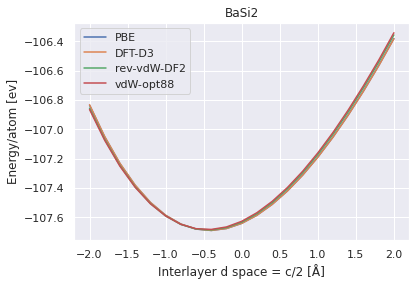

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/BaSi2/Layer/DFT-D3.txt'
rev = '../Layers/L_L_distance/BaSi2/Layer/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/BaSi2/Layer/PBE.txt'
lda = '../Layers/L_L_distance/BaSi2/Layer/LDA.txt'
vdw = '../Layers/L_L_distance/BaSi2/Layer/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)


# The starting distance between layers
#origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
#x += origo
n = 24 # Number of atoms
plt.plot(x, pbe['energy'])
plt.plot(x, dft['energy'])
plt.plot(x, rev['energy'])
plt.plot(x, vdw['energy'])
plt.legend(['PBE', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')

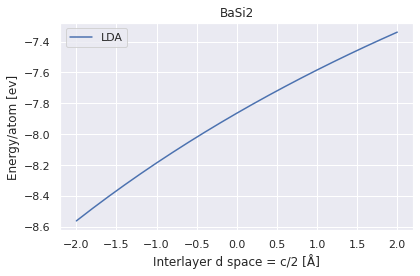

In [100]:
plt.plot(x, (lda['energy']-basi2_atoms)/n)
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')
plt.legend(['LDA'])

##### Bulk

Text(0, 0.5, 'Energy/atom [ev]')

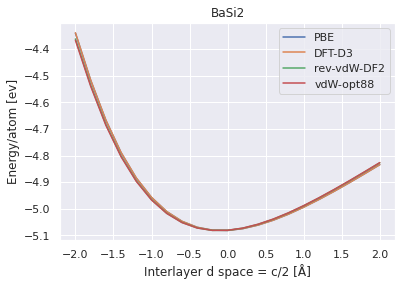

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/BaSi2/Bulk/DFT-D3.txt'
rev = '../Layers/L_L_distance/BaSi2/Bulk/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/BaSi2/Bulk/PBE.txt'
lda = '../Layers/L_L_distance/BaSi2/Bulk/LDA.txt'
vdw = '../Layers/L_L_distance/BaSi2/Bulk/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)


# The starting distance between layers
#origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
#x += origo
n = 24 # Number of atoms
plt.plot(x, (pbe['energy']-basi2_atoms)/n)
plt.plot(x, (dft['energy']-basi2_atoms)/n)
plt.plot(x, (rev['energy']-basi2_atoms)/n)
plt.plot(x, (vdw['energy']-basi2_atoms)/n)
plt.legend(['PBE', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')


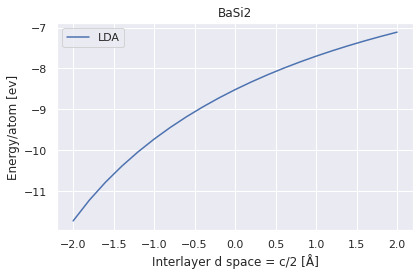

In [102]:
plt.plot(x, (lda['energy']-basi2_atoms)/n)
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')
plt.legend(['LDA'])

# Density of States

## Total DOS

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/Bulk
  warnings.warn("No POTCAR file with matching TITEL fields"


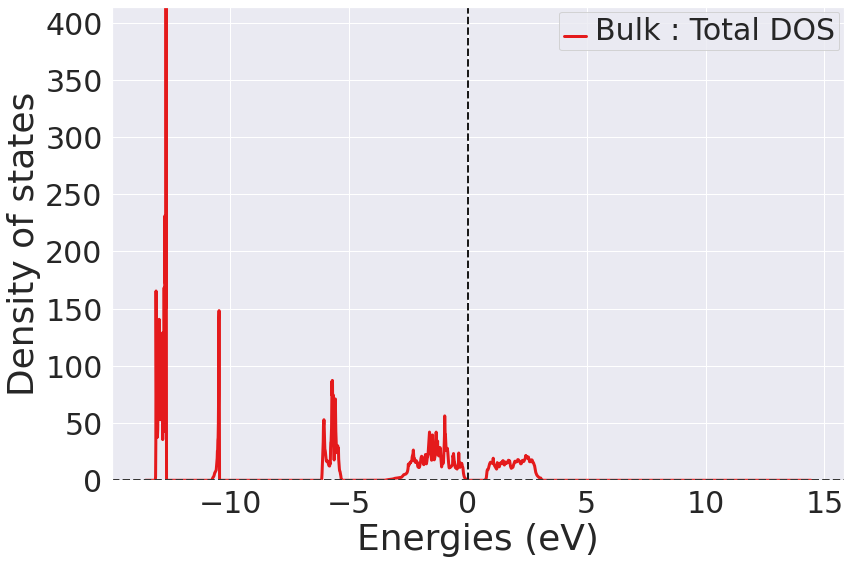

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L2
  warnings.warn("No POTCAR file with matching TITEL fields"


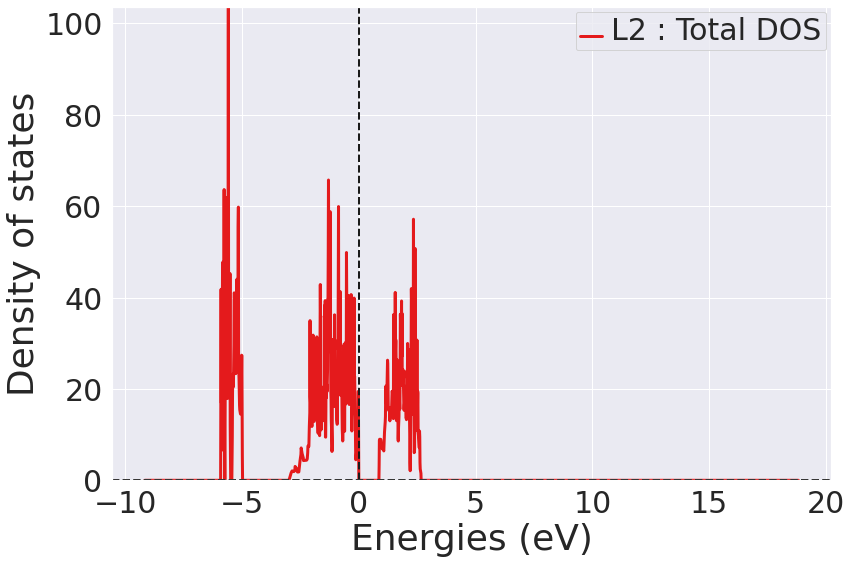

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L3
  warnings.warn("No POTCAR file with matching TITEL fields"


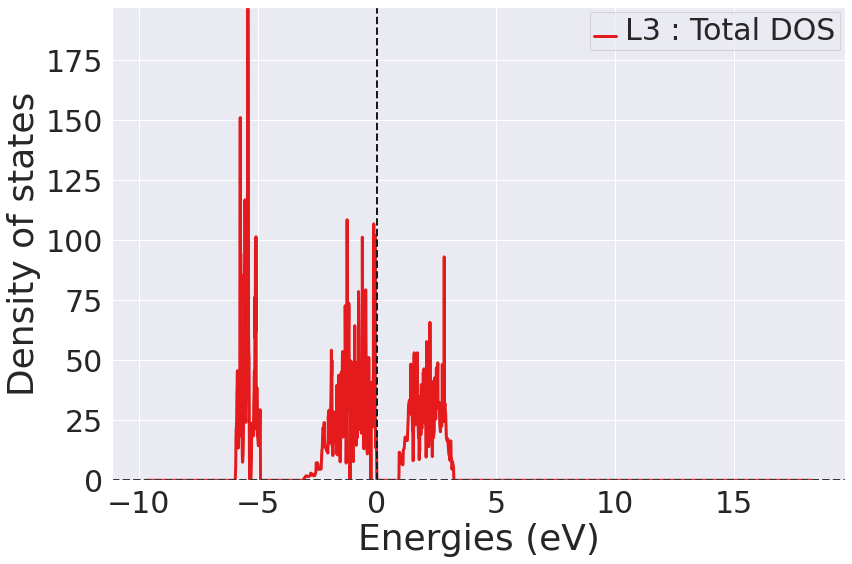

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L4
  warnings.warn("No POTCAR file with matching TITEL fields"


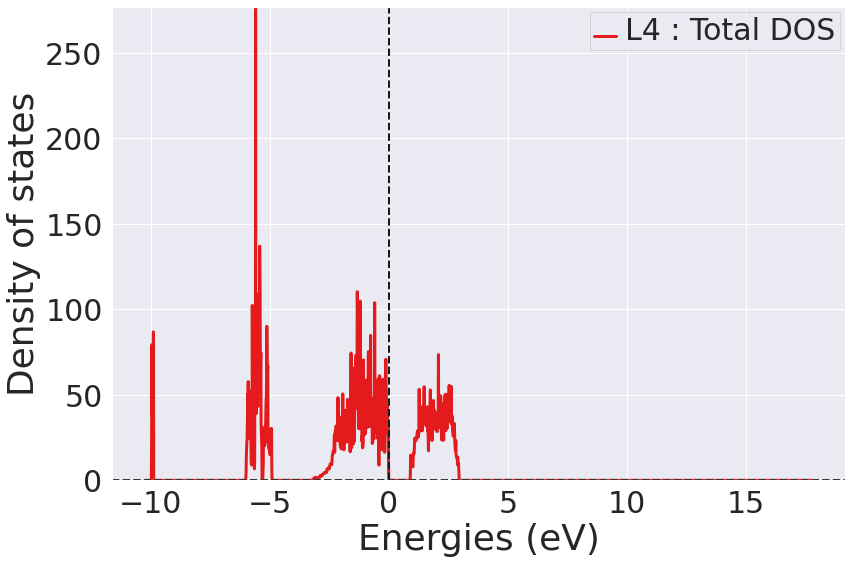

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L5
  warnings.warn("No POTCAR file with matching TITEL fields"


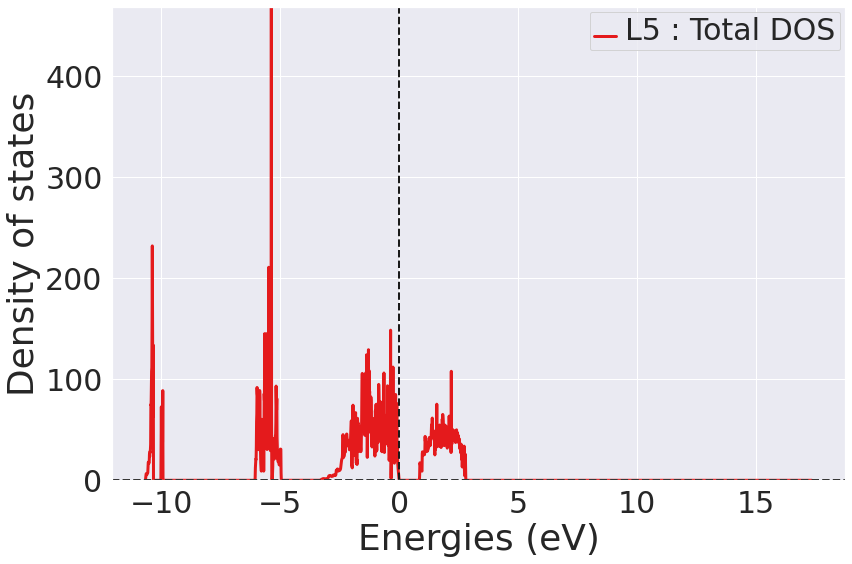

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L6
  warnings.warn("No POTCAR file with matching TITEL fields"


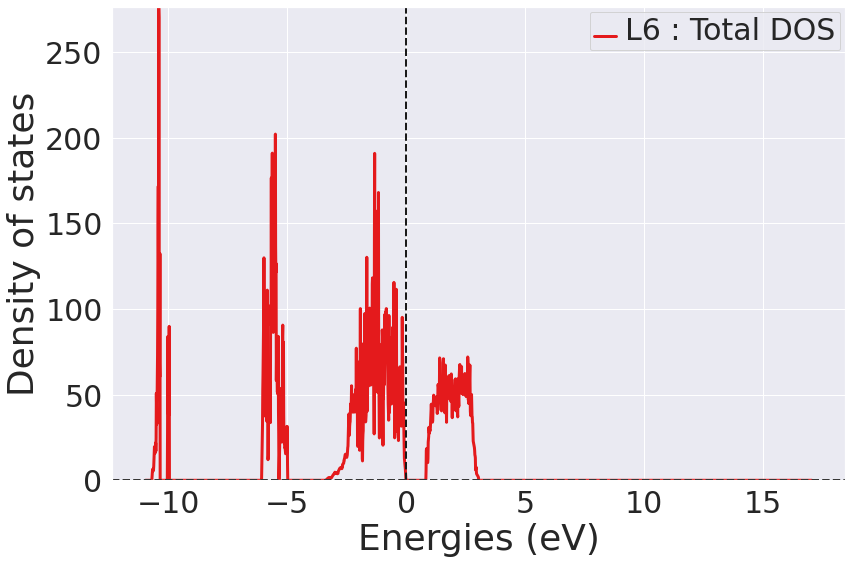

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L7
  warnings.warn("No POTCAR file with matching TITEL fields"


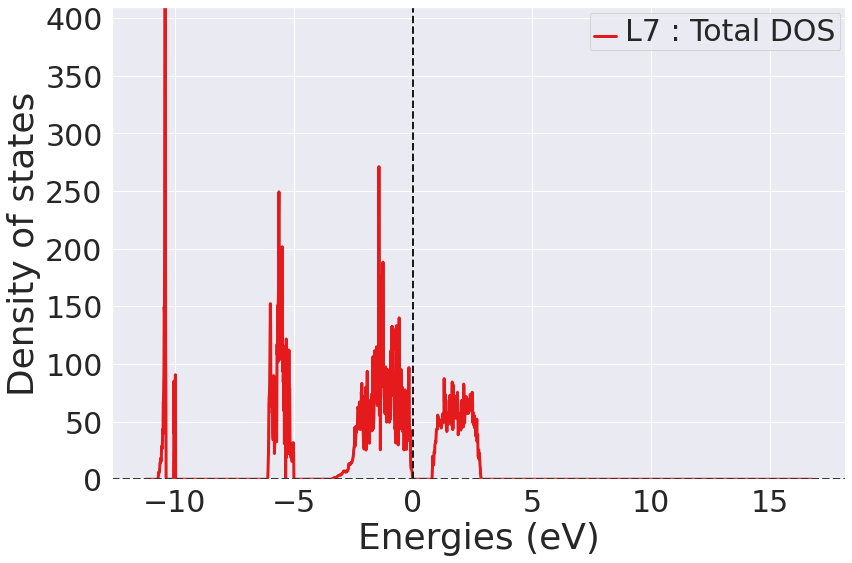

In [14]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter, BSDOSPlotter

folders = ['Bulk', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']

for folder in folders:
    
    
    thisdir = 'Layers/dos/' + folder + '/'


    v = Vasprun(thisdir+'vasprun.xml')
    tdos = v.tdos
    plotter = DosPlotter()
    plotter.add_dos(folder + " : Total DOS", tdos)
    plotter.show()

## Elemental DOS

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/Bulk
  warnings.warn("No POTCAR file with matching TITEL fields"


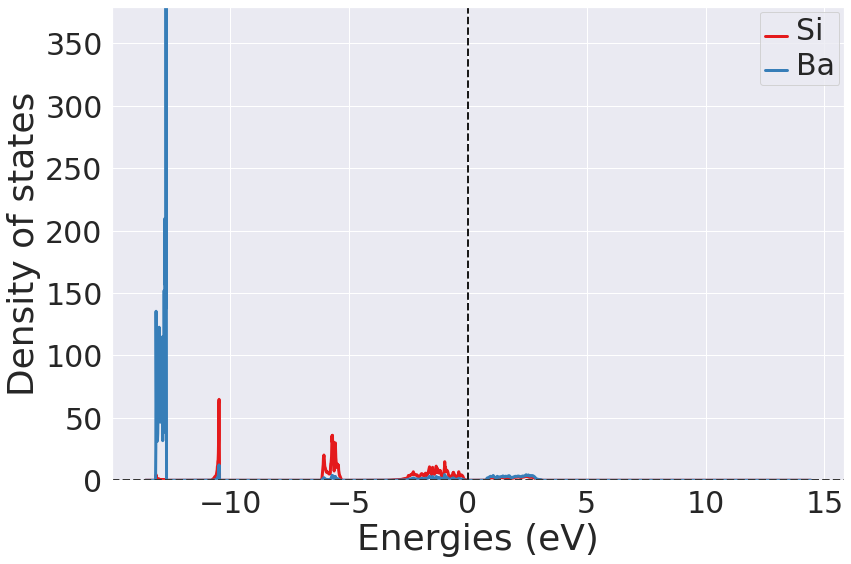

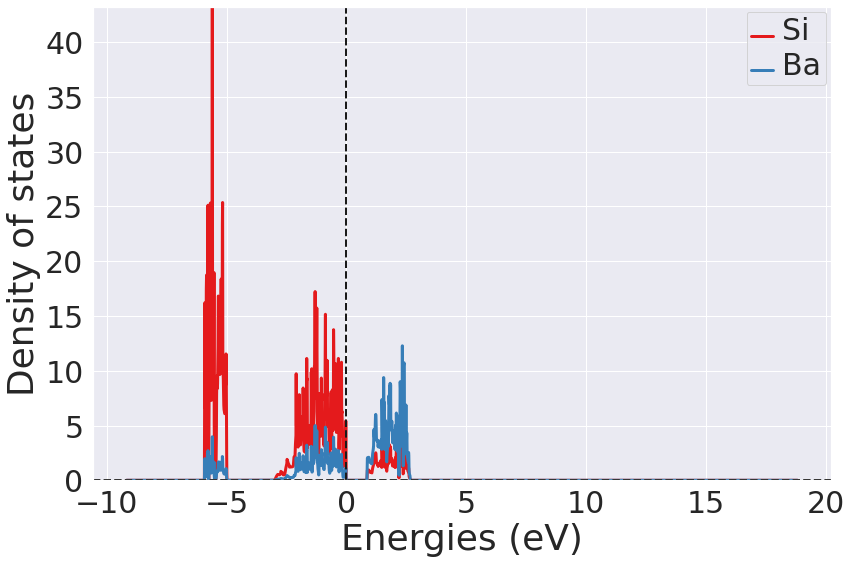

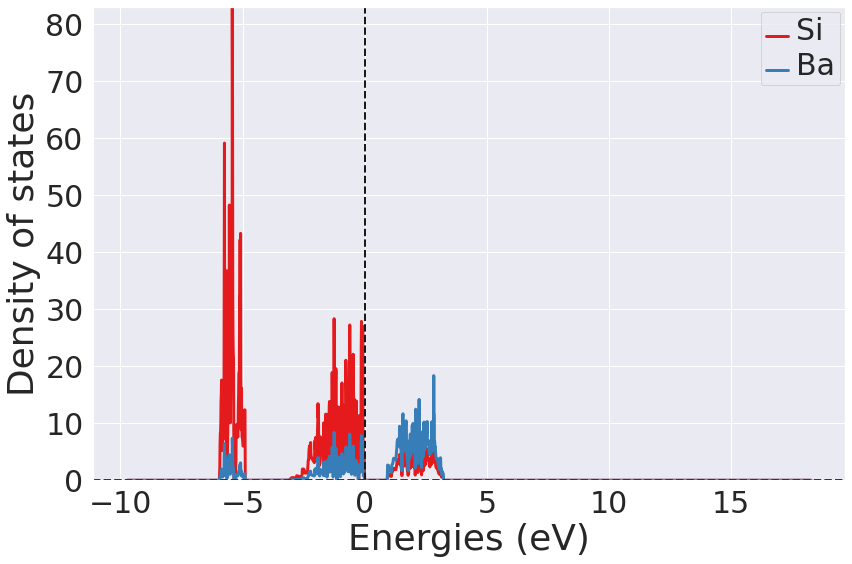

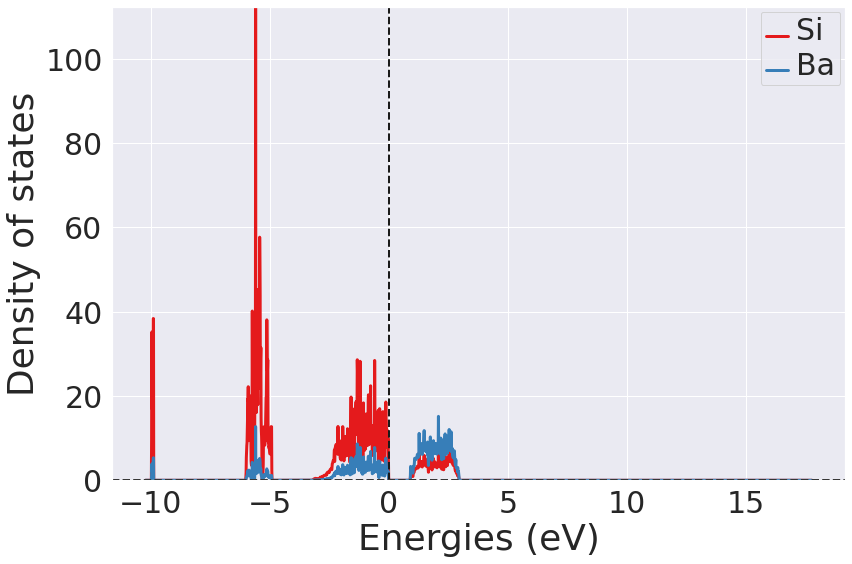

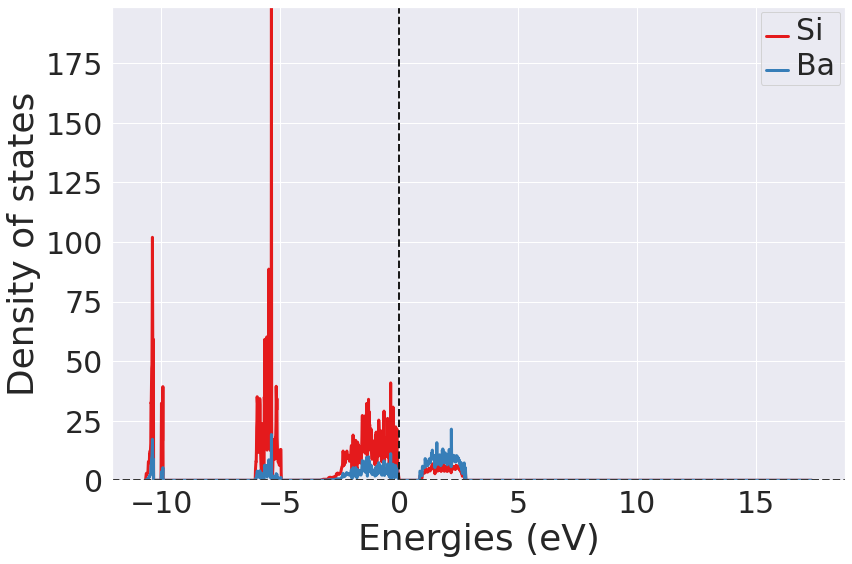

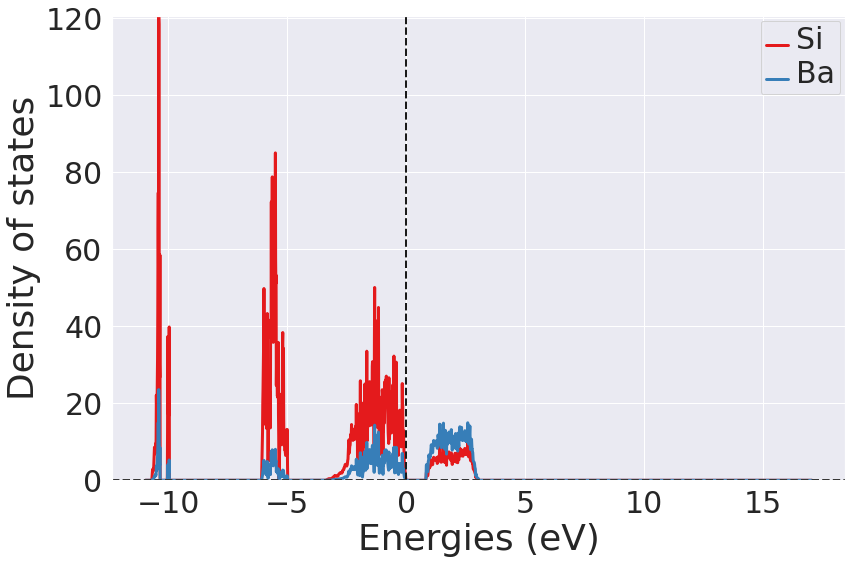

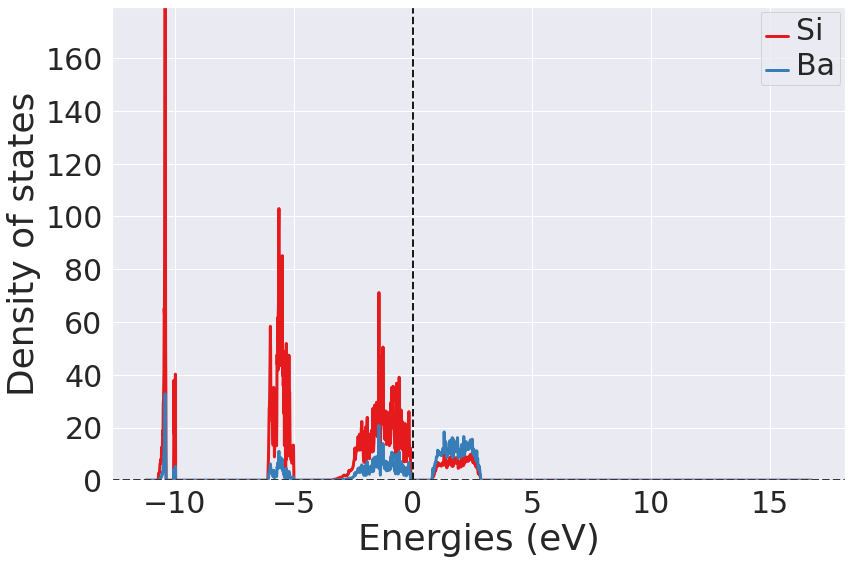

In [15]:
folders = ['Bulk', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
for folder in folders:
    
    
    thisdir = 'Layers/dos/' + folder + '/'


    v = Vasprun(thisdir+'vasprun.xml')
    cdos = v.complete_dos
    element_dos = cdos.get_element_dos()
    plotter = DosPlotter()
    plotter.add_dos_dict(element_dos)
    plotter.show()

### Si spd DOS 

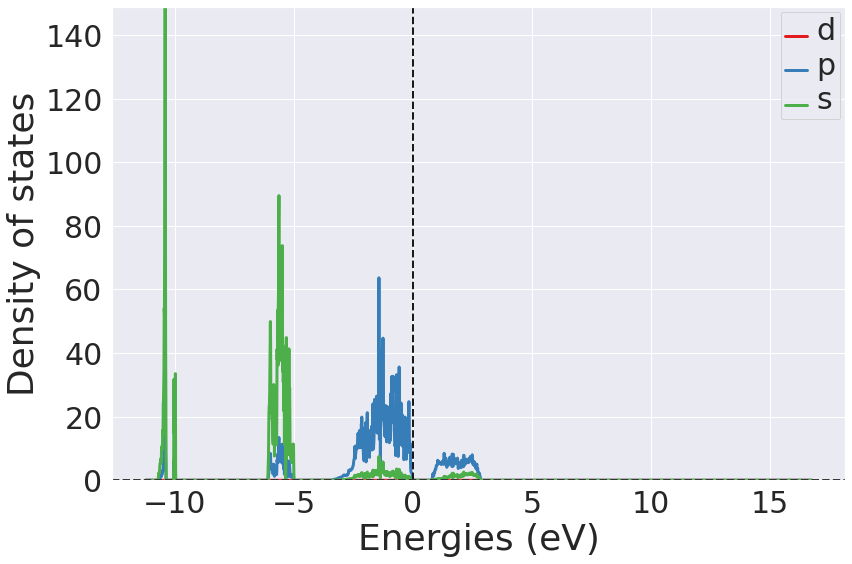

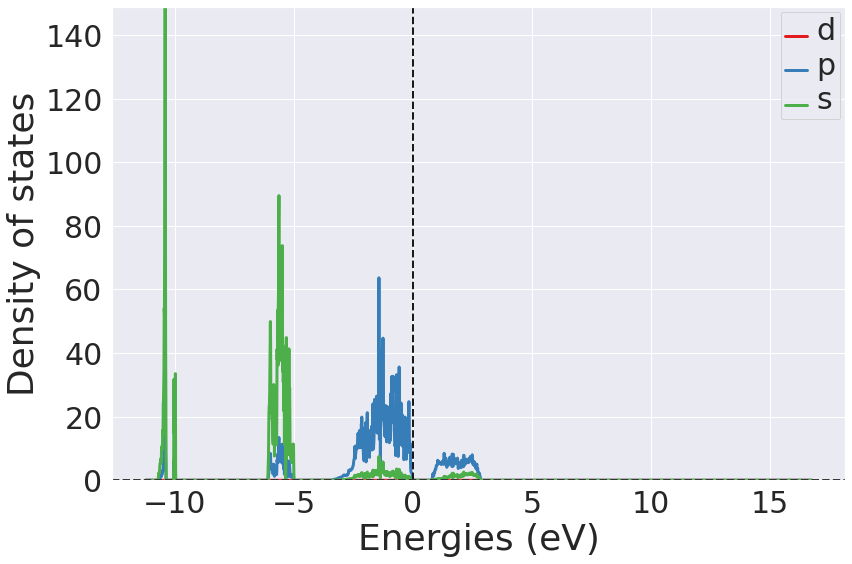

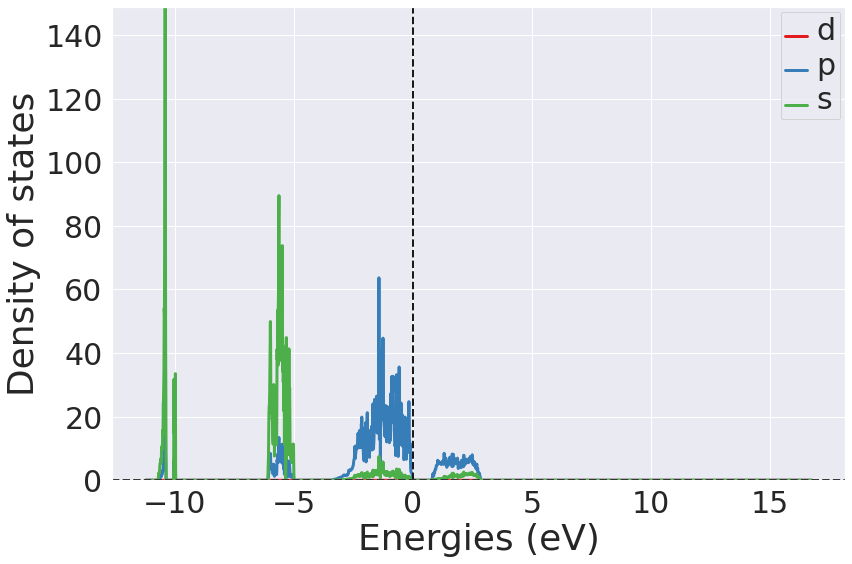

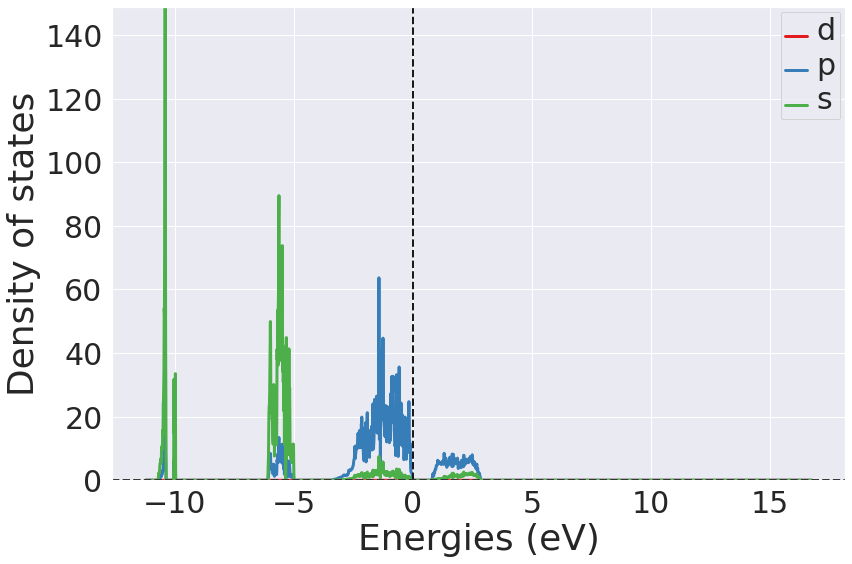

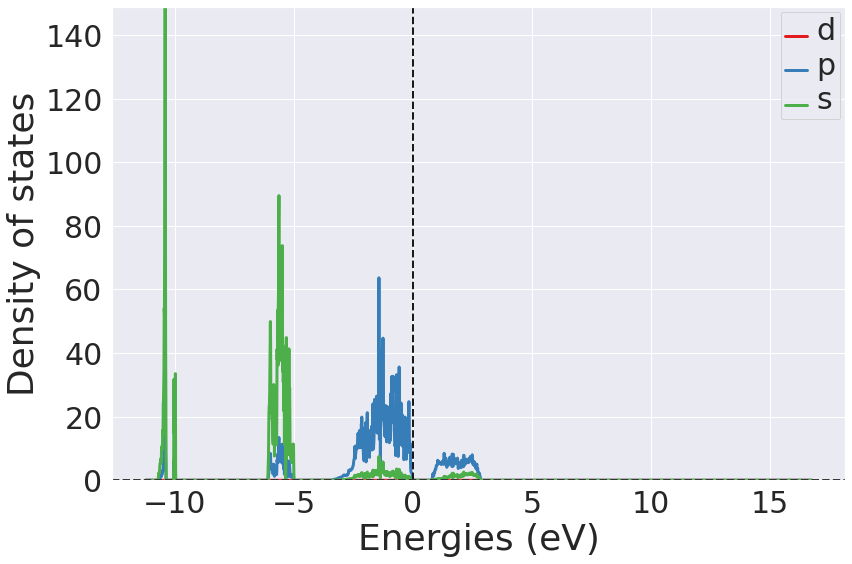

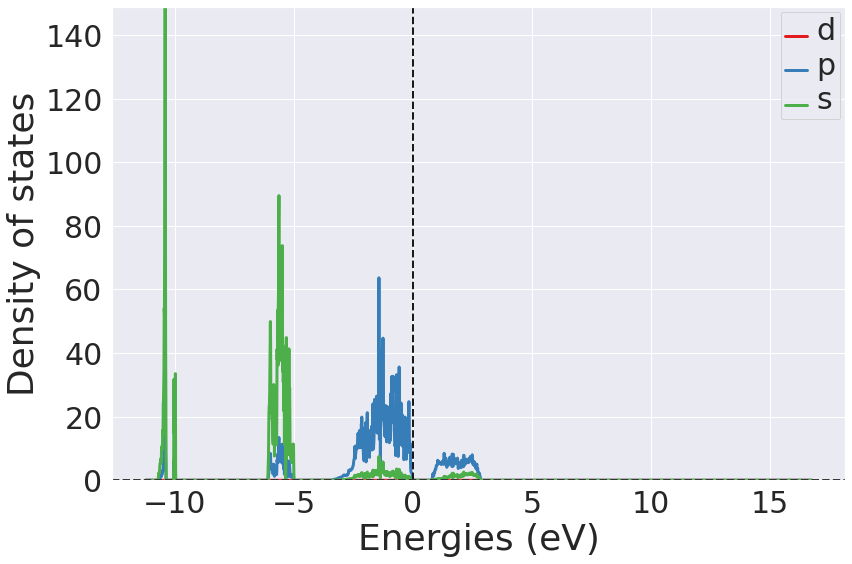

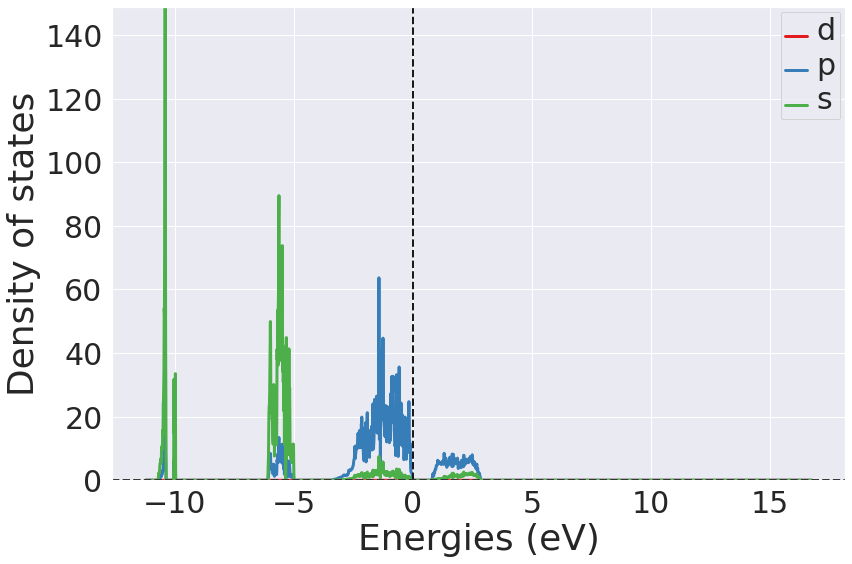

In [16]:
folders = ['Bulk', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
for folder in folders:
    
    
    thisdir = 'Layers/dos/' + folder + '/'
    cdos = v.complete_dos
    element_spd_dos = cdos.get_element_spd_dos('Si')
    plotter = DosPlotter()
    plotter.add_dos_dict(element_spd_dos)
    plotter.show()

### Ba spd DOS

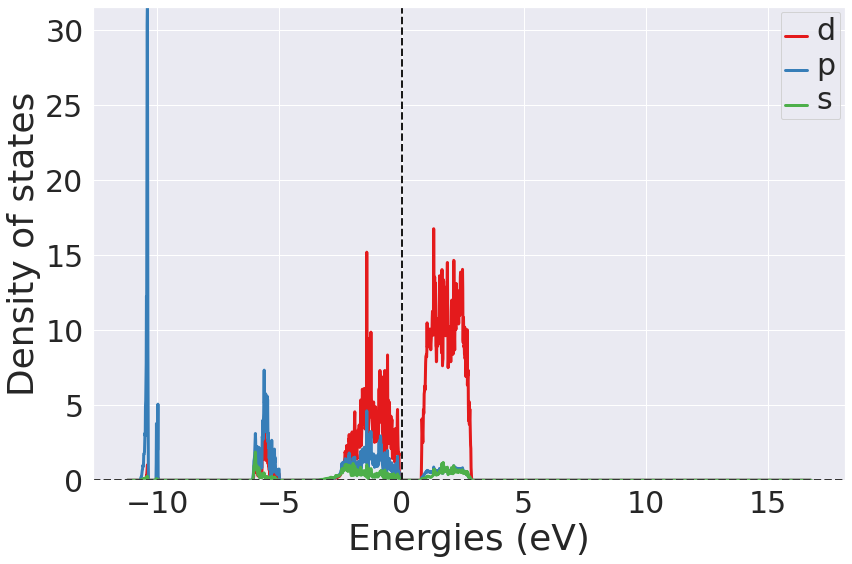

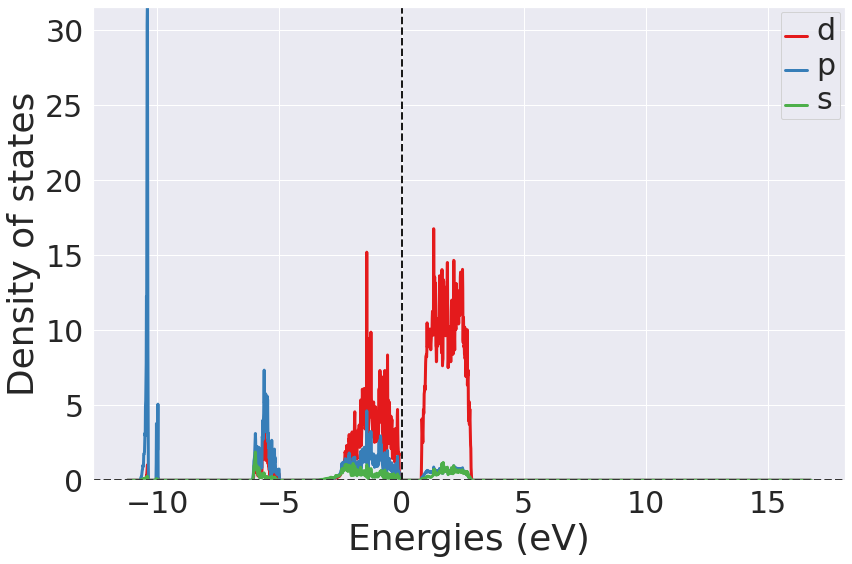

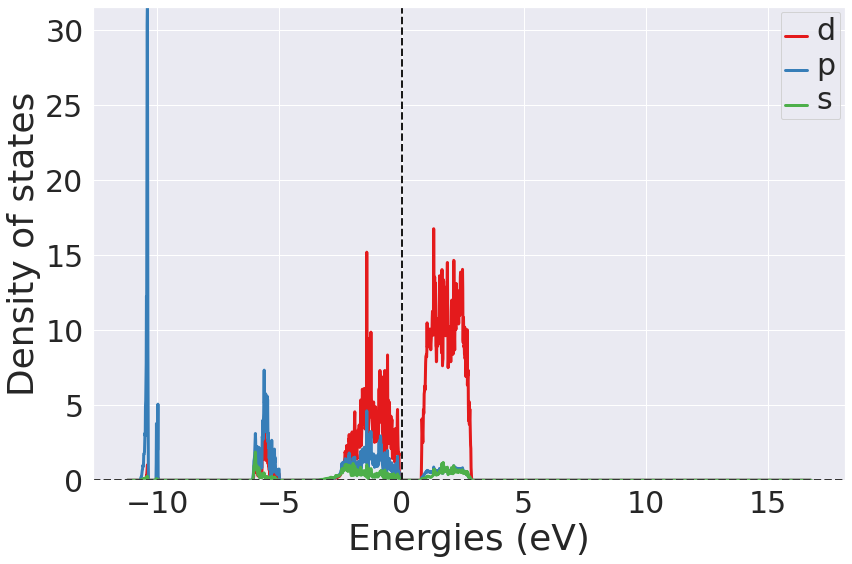

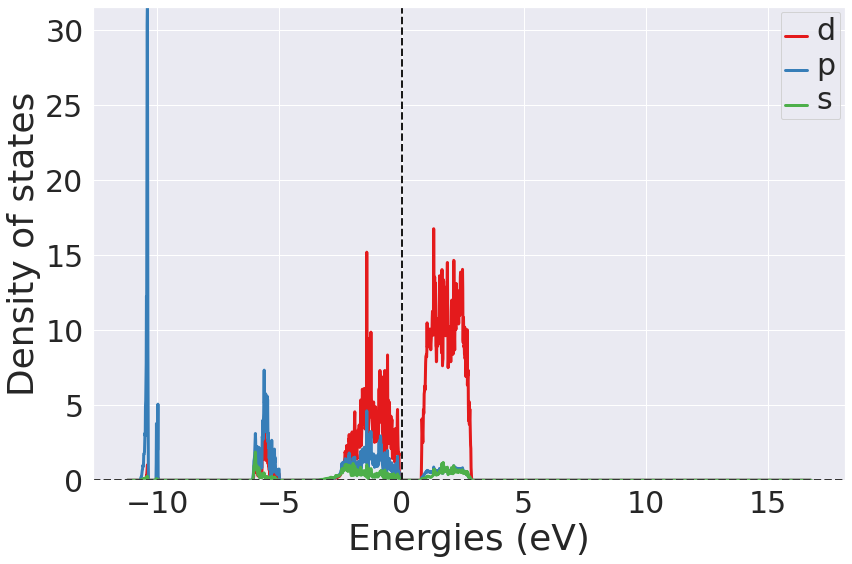

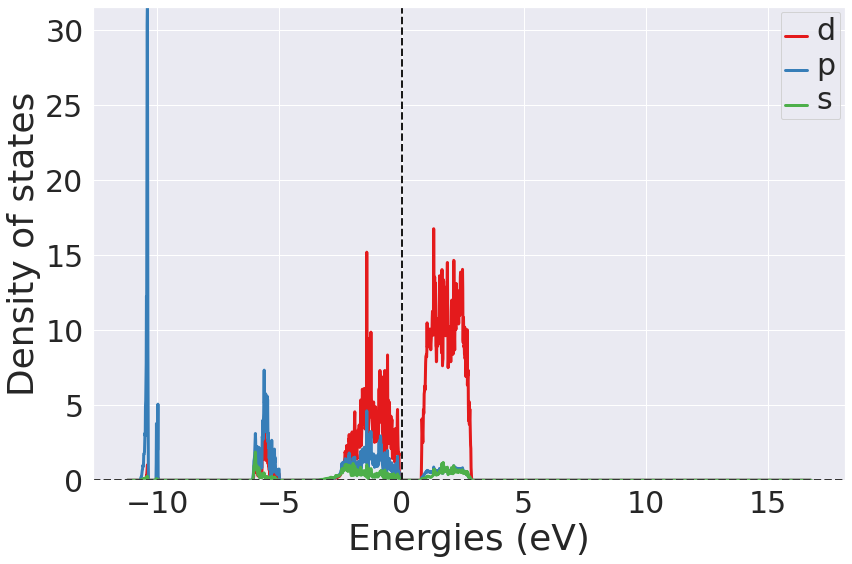

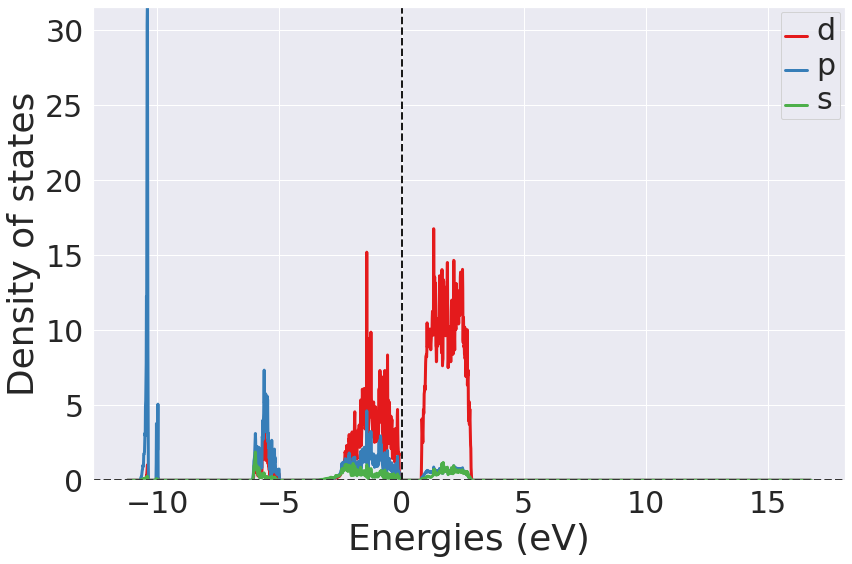

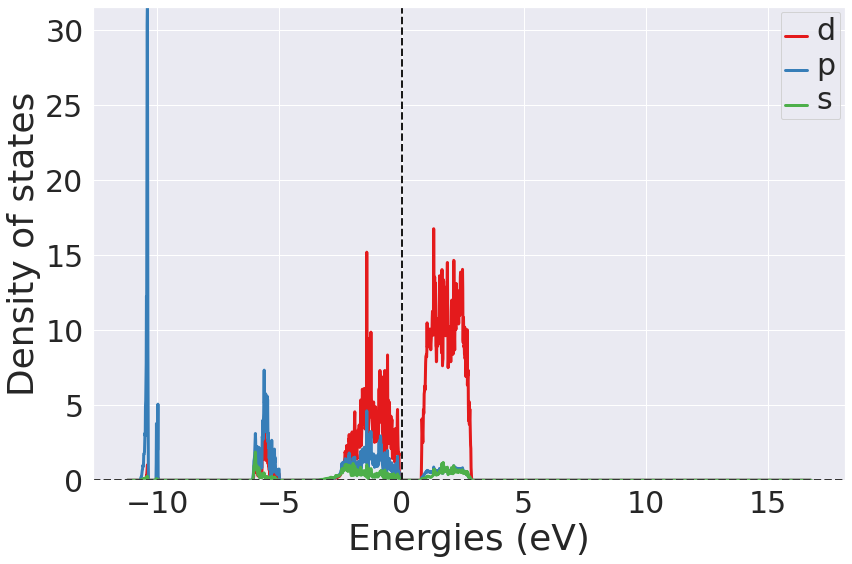

In [17]:
folders = ['Bulk', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
for folder in folders:
    
    
    thisdir = 'Layers/dos/' + folder + '/'
    cdos = v.complete_dos
    element_spd_dos = cdos.get_element_spd_dos('Ba')
    plotter = DosPlotter()
    plotter.add_dos_dict(element_spd_dos)
    plotter.show()

# Band Structure

## PBE + vdW

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/band_structure/rev-vdW-DF2/Bulk
  warnings.warn("No POTCAR file with matching TITEL fields"
/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/band_structure/rev-vdW-DF2/L2
  warnings.warn("No POTCAR file with matching TITEL fields"
/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/band_structure/rev-vdW-DF2/L3
  warnings.warn("No POTCAR file with matching TITEL fields"
/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with 

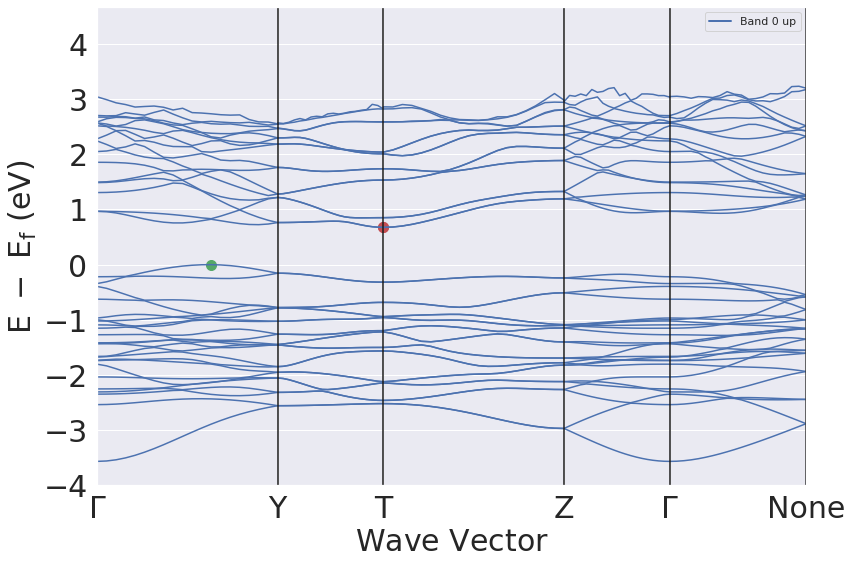

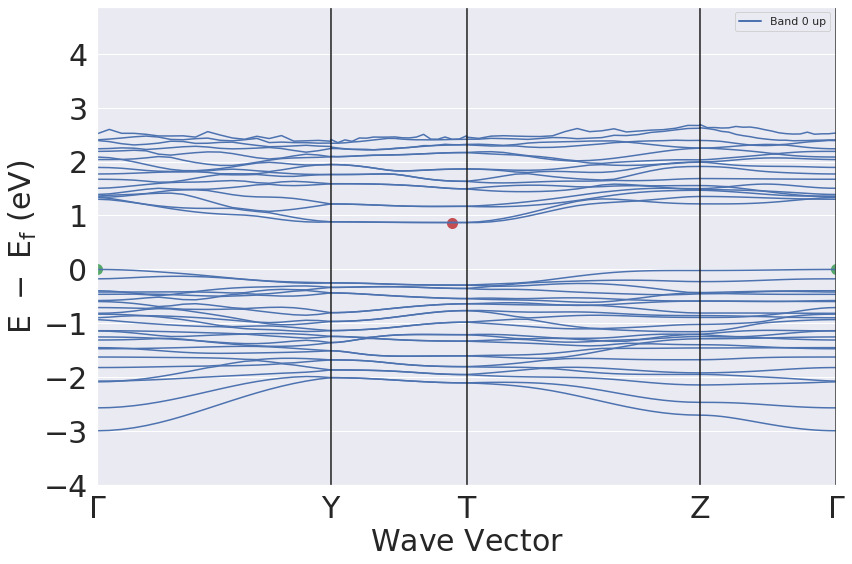

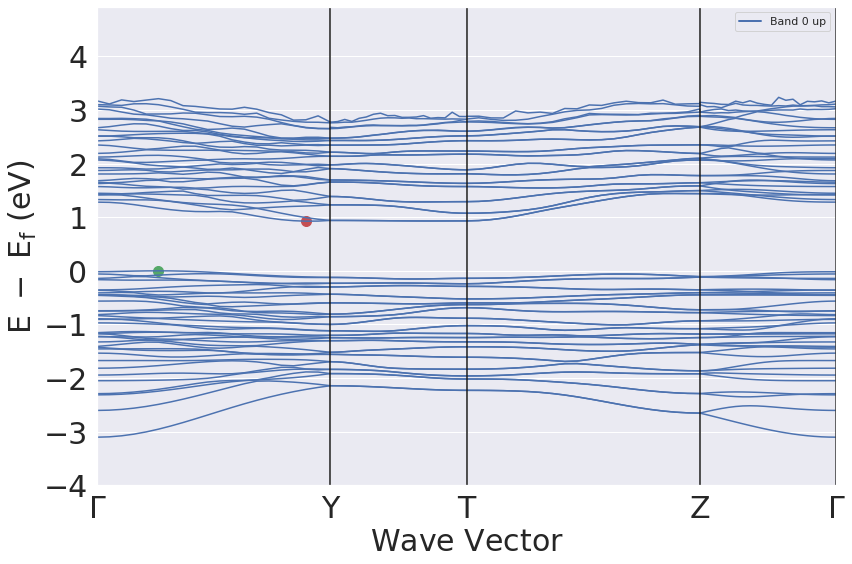

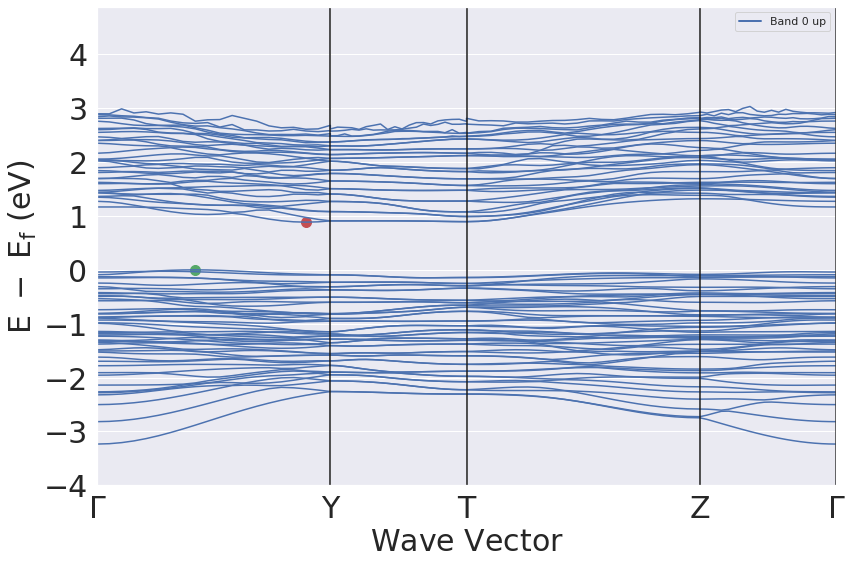

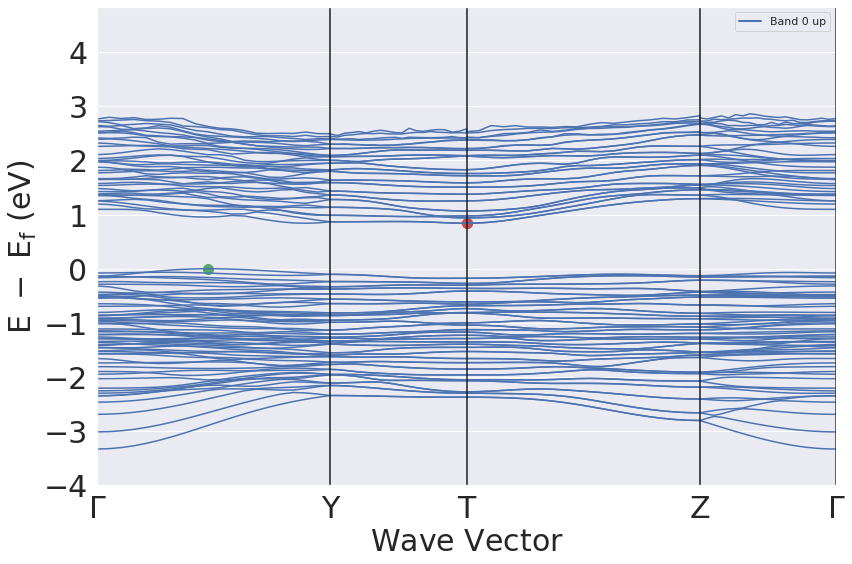

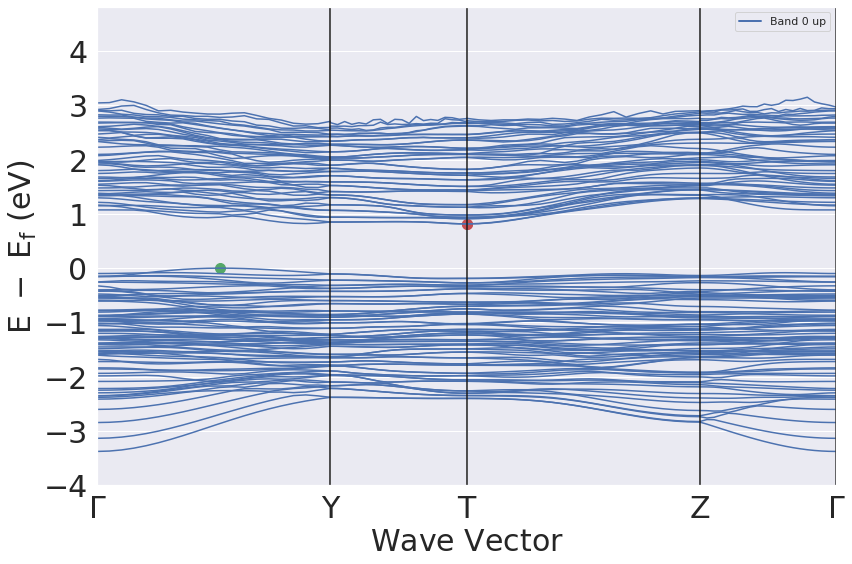

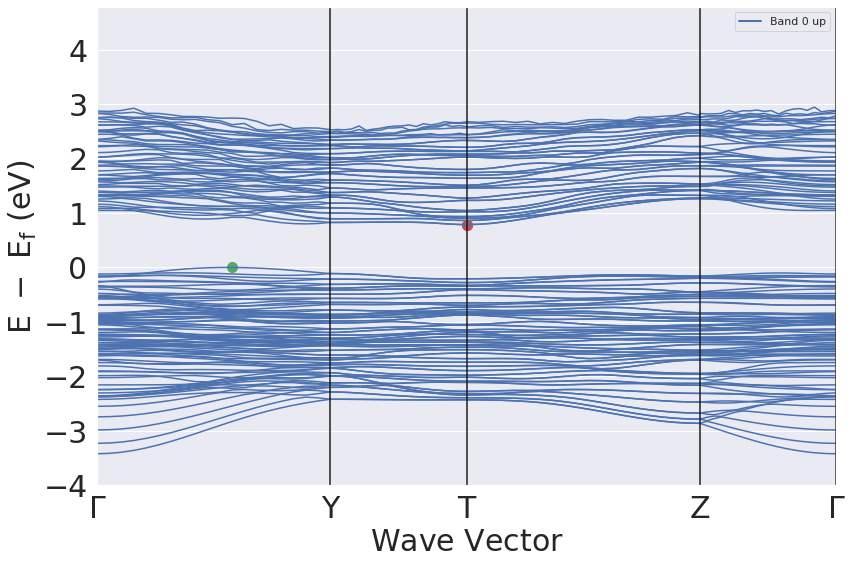

In [18]:
folders = ['Bulk', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
for folder in folders:

    thisdir = 'Layers/band_structure/rev-vdW-DF2/' + folder + '/'

    v = Vasprun(thisdir + 'vasprun.xml')
    gap = v.eigenvalue_band_properties

    v = BSVasprun(thisdir + 'vasprun.xml')
    bs = v.get_band_structure(kpoints_filename=thisdir+'KPOINTS', line_mode=True)
    plt = BSPlotter(bs)
    plt.get_plot(vbm_cbm_marker=True)

## HSE

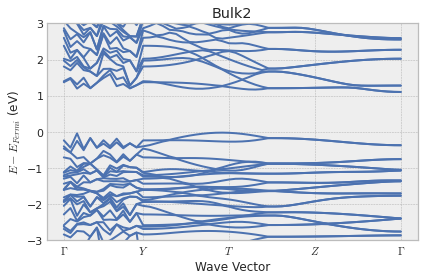

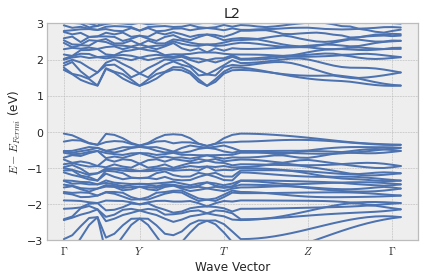

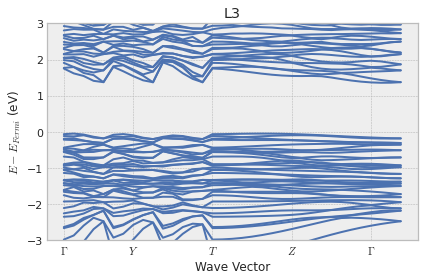

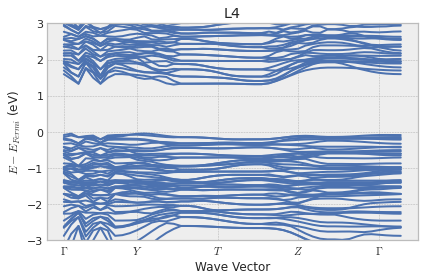

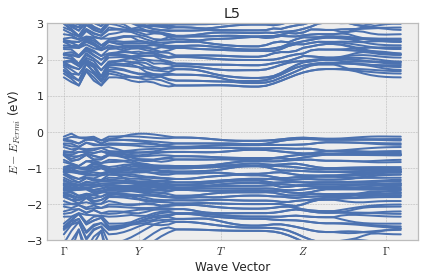

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from vasprun import vasprun
folders = ['Bulk2', 'L2', 'L3', 'L4', 'L5']

for folder in folders:

    thisdir = 'Layers/band_structure/HSE/' + folder + '/'

    vasp = vasprun(thisdir+'vasprun.xml')
    
    #vasp.plot_band()
    fig = plt.figure()
    vasp.plotbands(bravais="orthorhombic", kpoints=['Gamma', 'Y', 'T', 'Z', 'Gamma'], title=folder)
    
    

# Bandgap

## PBE + vdW

<ipython-input-20-042a1ebe1915>:19: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


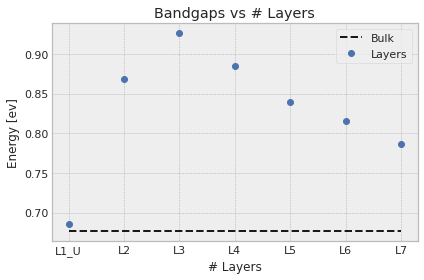

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

thisdir = 'Layers/bandgap/rev-vdW-DF2/bandgap.txt'
folders = ['L1_U', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
data = pd.read_table(thisdir, delim_whitespace=True)

bandgaps = data['Gap']

bulk = np.ones(len(bandgaps[3:]))*bandgaps[0]

plt.plot(folders, bulk, '--k')
plt.plot(folders, bandgaps[3:], 'ob')
plt.title("Bandgaps vs # Layers")
plt.ylabel("Energy [ev]")
plt.xlabel("# Layers")
plt.legend(['Bulk', 'Layers'])
plt.show()


## HSE

<ipython-input-24-361e847a2a44>:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


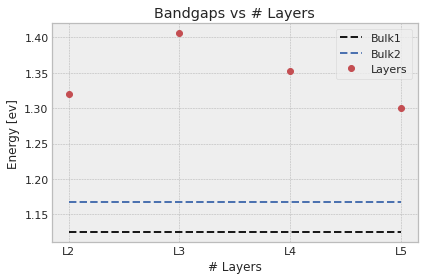

In [24]:
thisdir = 'Layers/bandgap/HSE/bandgap.txt'
folders = ['L2', 'L3', 'L4', 'L5']
data = pd.read_table(thisdir, delim_whitespace=True)

bandgaps = data['Gap']

bulk1 = np.ones(len(bandgaps[2:]))*bandgaps[0]
bulk2 = np.ones(len(bandgaps[2:]))*bandgaps[1]

plt.plot(folders, bulk1, '--k')
plt.plot(folders, bulk2, '--b')
plt.plot(folders, bandgaps[2:], 'or')
plt.title("Bandgaps vs # Layers")
plt.ylabel("Energy [ev]")
plt.xlabel("# Layers")
plt.legend(['Bulk1', 'Bulk2', 'Layers'])
plt.show()